In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import random
from random import sample 
import pandas as pd
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
import os
import json
from tqdm import tqdm
import networkx as nx
import pickle
# plot mention matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Wordcloud section 
Main responsible Andreas

In [2]:
with open(r"LargeData\Graph_all.pkl", 'rb') as file:
    graph = pickle.load(file)

In [3]:
flair_list = ["intp","intj","entp","entj","infj","infp","enfj","enfp","istj","isfj","estj","esfj","istp","isfp","estp","esfp"]
extended_flair_list = flair_list + ["submissions"]

mention_dict = {}
id_dict = {}
text_dict = {}

for flair in flair_list:
    mention_dict[flair] = 0
    id_dict[flair] = []
    text_dict[flair] = []

for edge in graph.edges:
    author = edge[0]
    addressee = edge[1]

    

    #Check if node is empty
    if graph.nodes[addressee] == {} or graph.nodes[author] == {}:
        continue

    author_flair = graph.nodes[author]['flair']
    addressee_flair = graph.nodes[addressee]['flair']
    if author_flair not in flair_list: 
        continue

    mention_dict[author_flair]+= 1
    id_dict[author_flair].append(graph.edges[edge]['comment_id'])
    text_dict[author_flair].append(graph.edges[edge]['comment'])

for node in graph.nodes:
    if graph.nodes[node] == {}: 
        continue
    author_flair = graph.nodes[node]['flair']
    if author_flair not in flair_list: 
        continue
    mention_dict[author_flair]+= len(graph.nodes[node]['submissions_id'])
    id_dict[author_flair].append(graph.nodes[node]['submissions_id'])
    text_dict[author_flair].append(graph.nodes[node]['submissions'])

In [4]:
vectorizer = TfidfVectorizer()

#all documents
all = []
for text in text_dict.values():
    all.extend(text)

tf_idf= vectorizer.fit_transform([' '.join(text) for text in all])
#names = list(text_dict.keys())

In [5]:
# make mega document
types_text = []
for text in text_dict.values():
    types_text.extend(text)

tf_idf = vectorizer.transform([' '.join(text) for text in types_text])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Andre\anaconda3\envs\SkabsHumanisme\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Andre\AppData\Local\Temp\ipykernel_17244\1923566495.py", line 6, in <module>
    tf_idf = vectorizer.transform([' '.join(text) for text in types_text])
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Andre\anaconda3\envs\SkabsHumanisme\Lib\site-packages\sklearn\feature_extraction\text.py", line 2157, in transform
    X = super().transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Andre\anaconda3\envs\SkabsHumanisme\Lib\site-packages\sklearn\feature_extraction\text.py", line 1433, in transform
    _, X = self._count_vocab(raw_documents, fixed_vocab=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Andre\anaconda3\envs\SkabsHumanisme\Lib\site-packag

In [12]:
def tf_idf_to_string(tf_idf_matrix, word_list):
    feature_index = tf_idf_matrix.nonzero()[1]
    tfidf_scores = [(word_list[i], tf_idf_matrix[0, i]) for i in feature_index]
    tf_idf_string = ''
    for word, score in tfidf_scores:
        tf_idf_string += (word + ' ') * int(score * 100000)  # Multiplying by 10 for better visualization
    return tf_idf_string

data_for_wordcloud = []
for i in range(16):
    data_for_wordcloud.append(tf_idf_to_string(tf_idf[i, :], word_list = vectorizer.get_feature_names_out()))

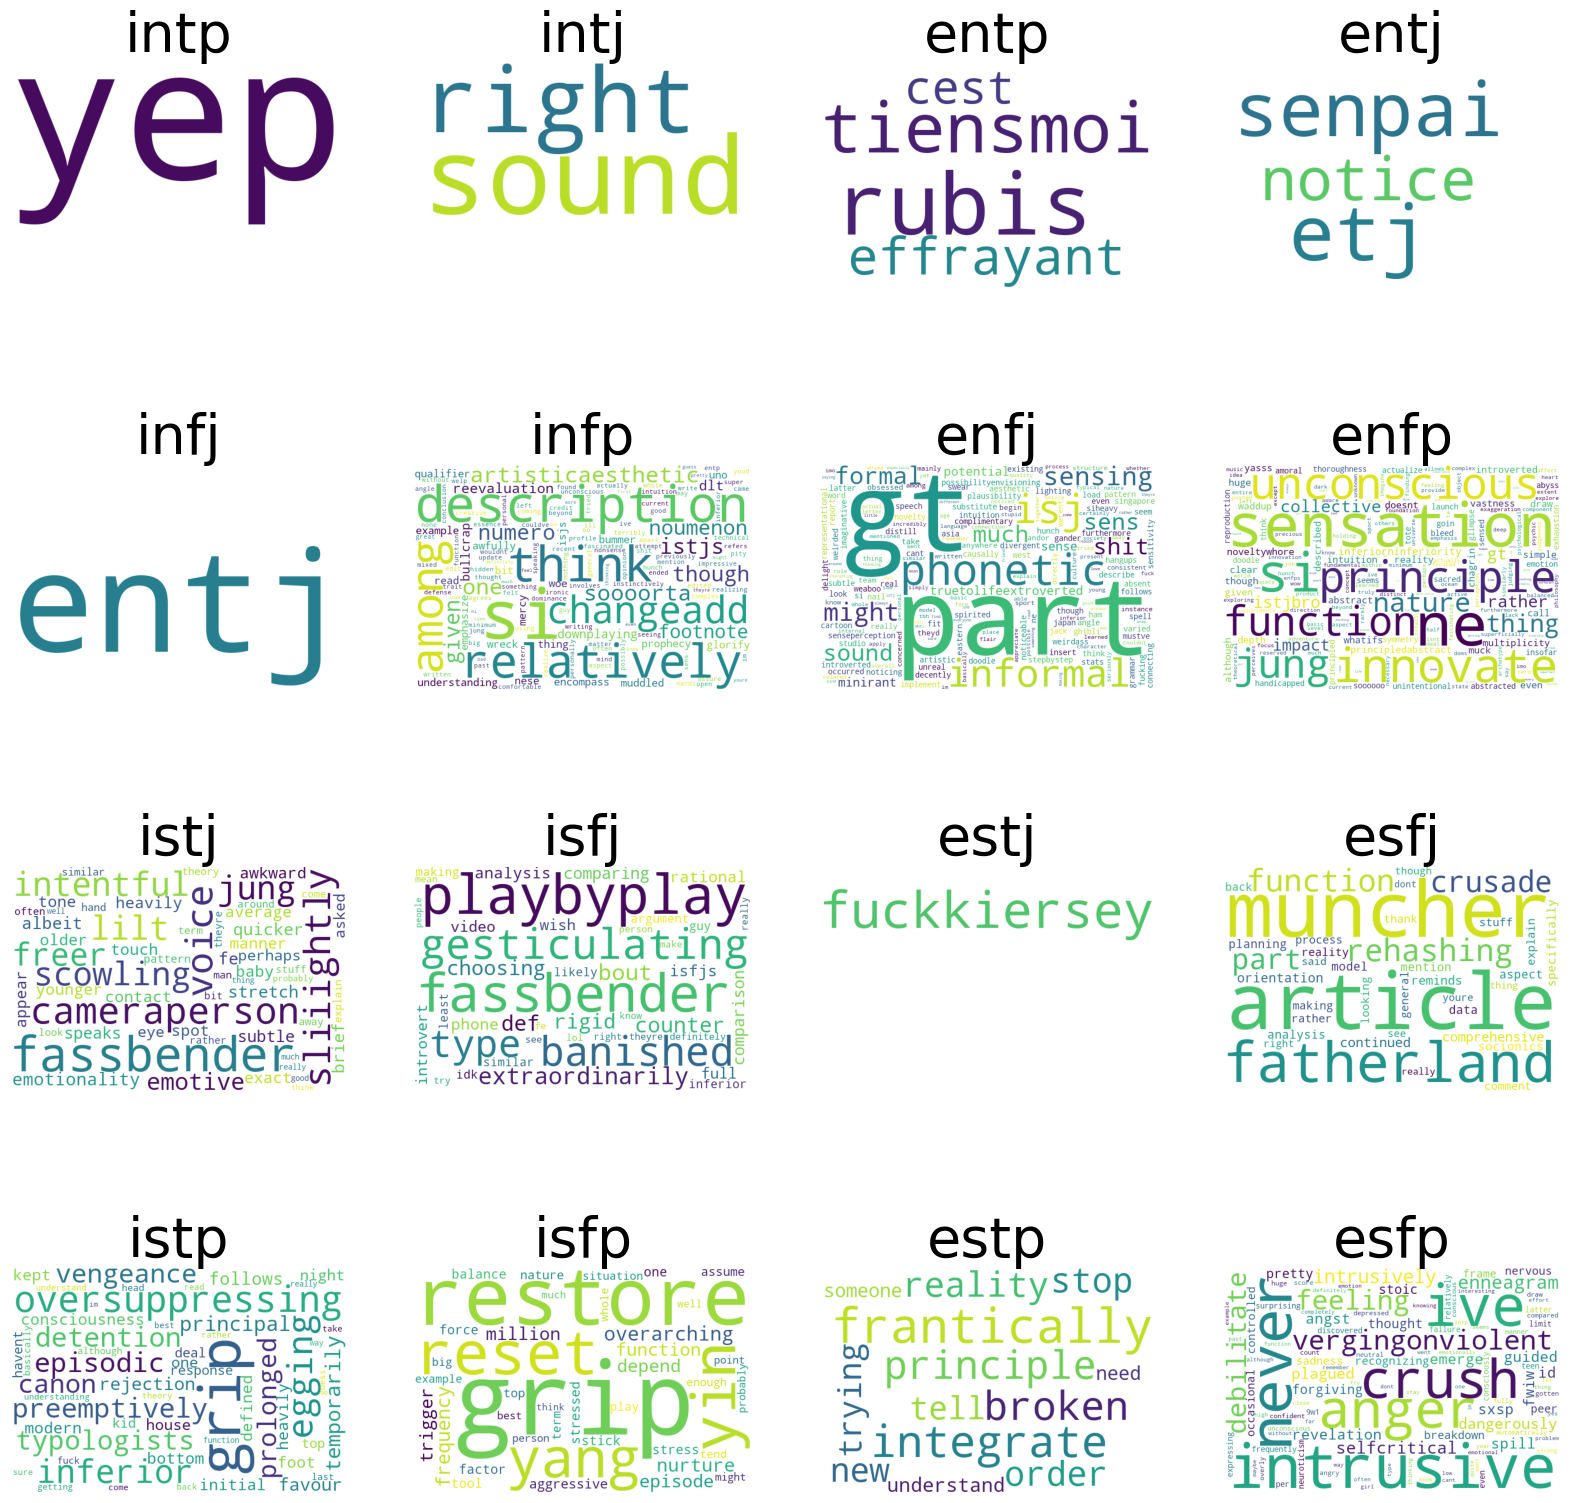

In [13]:
fig, ax = plt.subplots(4, 4, figsize=[20, 20])
names = list(text_dict.keys())
for i in range(4):
    for j in range(4):

        wordcloud = WordCloud(background_color='white', width=600, height=400,collocations=False).generate(data_for_wordcloud[4*i+j])
        ax[i,j].imshow(wordcloud)
        ax[i,j].axis('off')
        ax[i,j].set_title(names[4*i+j],fontsize=40)
plt.show()

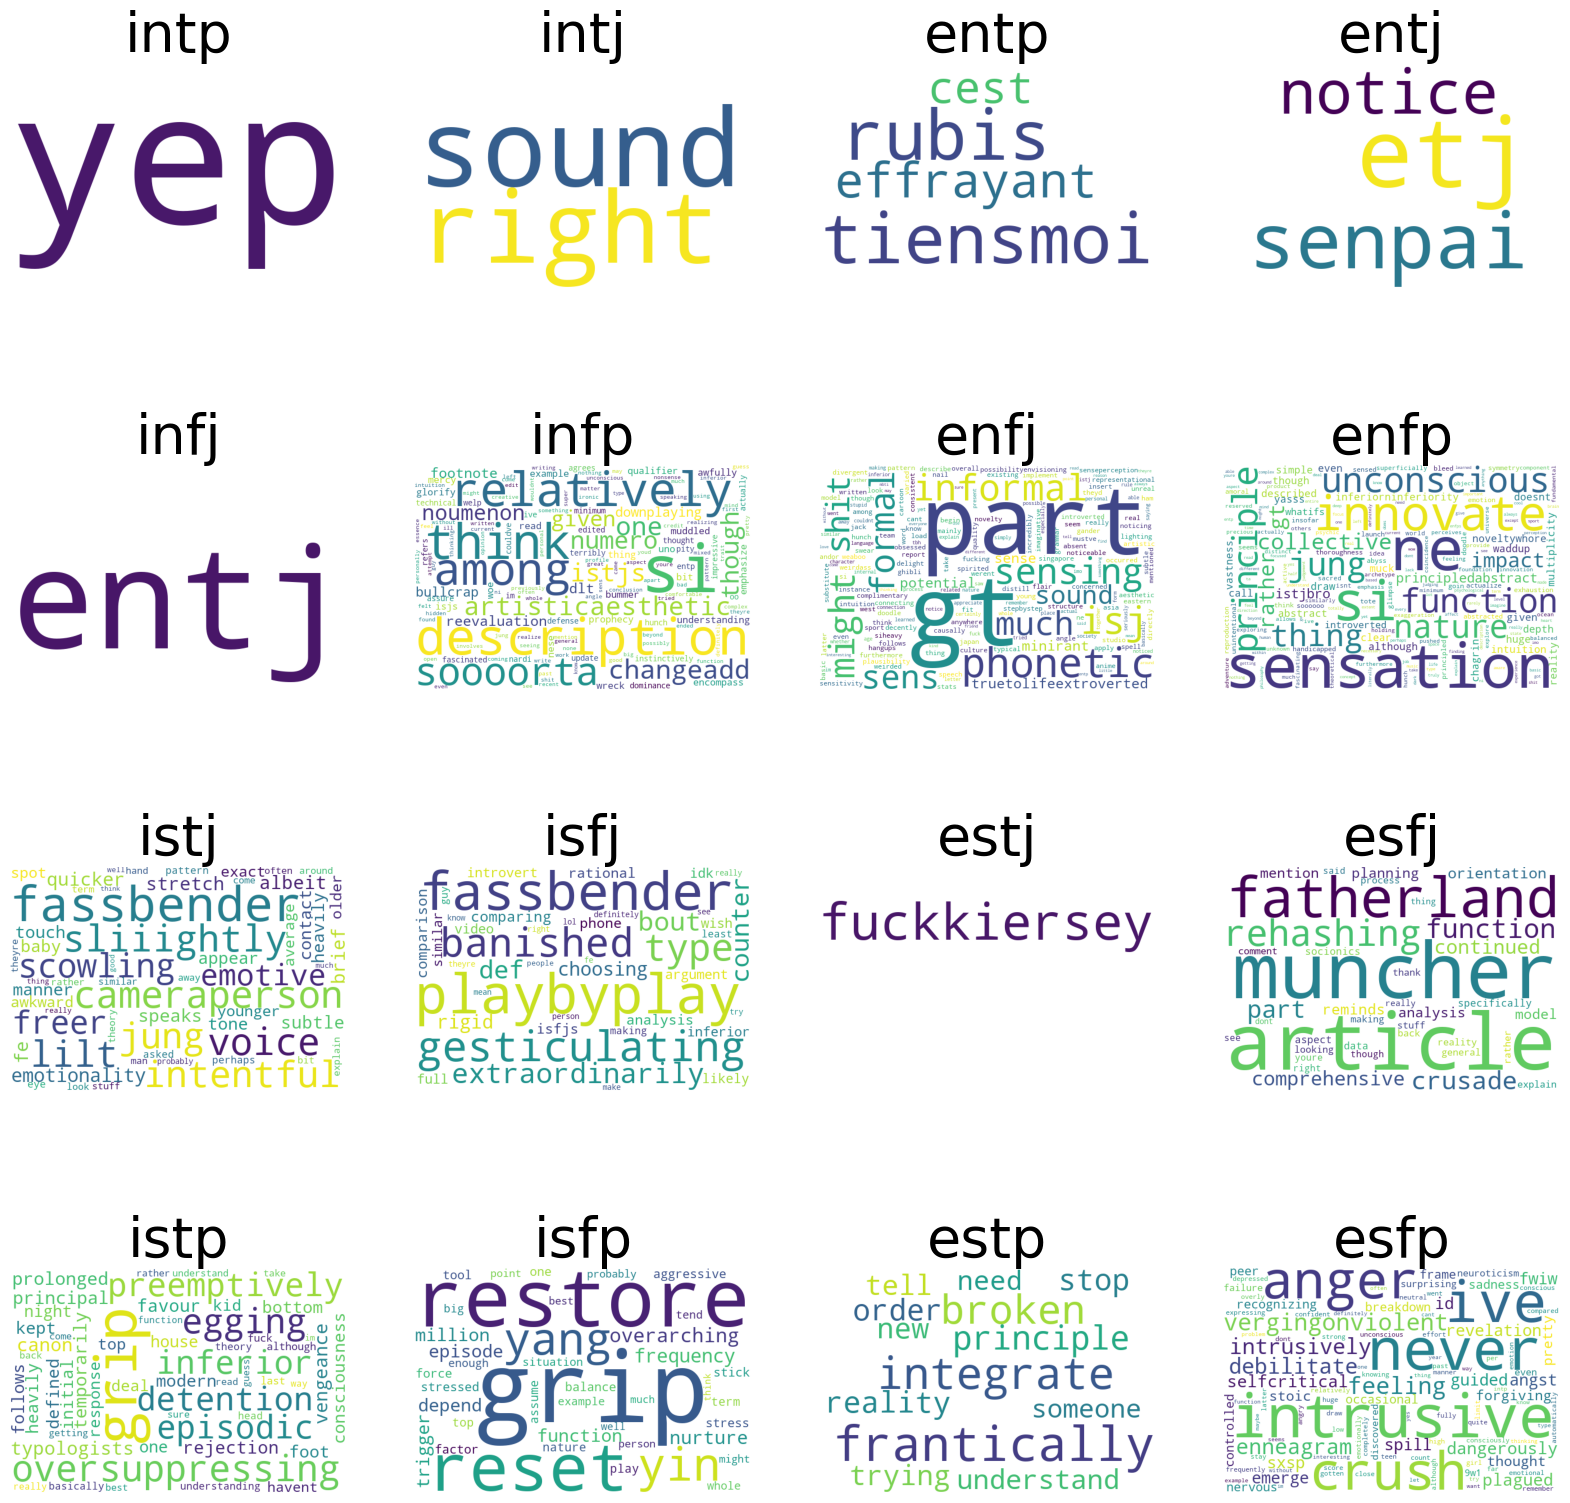

In [33]:
fig, ax = plt.subplots(4, 4, figsize=[20, 20])
for i in range(4):
    for j in range(4):

        wordcloud = WordCloud(background_color='white', width=600, height=400,collocations=False).generate(data_for_wordcloud[4*i+j])
        ax[i,j].imshow(wordcloud)
        ax[i,j].axis('off')
        ax[i,j].set_title(names[4*i+j],fontsize=40)
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8,min_df=0.2,ngram_range=(2,2))
names = list(text_dict.keys())
tf_idf= vectorizer.fit_transform([' '.join(list) for list in text_dict.values()])
word_list = vectorizer.get_feature_names_out()

In [8]:
data_for_wordcloud = []
for i in range(16):
    data_for_wordcloud.append(tf_idf_to_string(tf_idf[i, :], word_list))

fig, ax = plt.subplots(4, 4, figsize=[20, 20])
for i in range(4):
    for j in range(4):

        wordcloud = WordCloud(background_color='white', width=600, height=400,collocations=False).generate(data_for_wordcloud[4*i+j])
        ax[i,j].imshow(wordcloud)
        ax[i,j].axis('off')
        ax[i,j].set_title(names[4*i+j],fontsize=40)
plt.show()

KeyboardInterrupt: 